Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
weather_prediction = pd.read_csv('weather_classification_data.csv')
weather_prediction.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [33]:
weather_prediction.shape

(13200, 11)

In [34]:
weather_prediction.isnull().sum()

Temperature             25
Humidity                 1
Wind Speed               1
Precipitation (%)        1
Cloud Cover              0
Atmospheric Pressure    27
UV Index                 0
Season                   9
Visibility (km)          0
Location                 0
Weather Type             0
dtype: int64

Dropping Null valued rows


In [35]:
print("Shape of dataframe before dropping:", weather_prediction.shape)
weather_prediction = weather_prediction.dropna(axis = 0, subset = ['Season'])
weather_prediction.isnull().sum()

Shape of dataframe before dropping: (13200, 11)


Temperature             25
Humidity                 1
Wind Speed               1
Precipitation (%)        1
Cloud Cover              0
Atmospheric Pressure    27
UV Index                 0
Season                   0
Visibility (km)          0
Location                 0
Weather Type             0
dtype: int64

In [36]:
weather_prediction = weather_prediction.dropna(axis = 0, subset = ['Temperature'])
weather_prediction.isnull().sum()

Temperature              0
Humidity                 1
Wind Speed               1
Precipitation (%)        1
Cloud Cover              0
Atmospheric Pressure    27
UV Index                 0
Season                   0
Visibility (km)          0
Location                 0
Weather Type             0
dtype: int64

In [37]:
weather_prediction = weather_prediction.dropna(axis = 0, subset = ['Atmospheric Pressure'])
weather_prediction.isnull().sum()

Temperature             0
Humidity                1
Wind Speed              1
Precipitation (%)       1
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [38]:
print("Shape of dataframe after dropping:", weather_prediction.shape)

Shape of dataframe after dropping: (13139, 11)


Imputing Missing Value


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(weather_prediction[['Humidity']])

weather_prediction['Humidity'] = impute.transform(weather_prediction[['Humidity']])

In [41]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(weather_prediction[['Wind Speed']])

weather_prediction['Wind Speed'] = impute.transform(weather_prediction[['Wind Speed']])

In [42]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(weather_prediction[['Precipitation (%)']])

weather_prediction['Precipitation (%)'] = impute.transform(weather_prediction[['Precipitation (%)']])

In [43]:
weather_prediction.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [44]:
weather_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13139 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13139 non-null  float64
 1   Humidity              13139 non-null  float64
 2   Wind Speed            13139 non-null  float64
 3   Precipitation (%)     13139 non-null  float64
 4   Cloud Cover           13139 non-null  object 
 5   Atmospheric Pressure  13139 non-null  float64
 6   UV Index              13139 non-null  int64  
 7   Season                13139 non-null  object 
 8   Visibility (km)       13139 non-null  float64
 9   Location              13139 non-null  object 
 10  Weather Type          13139 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


Encoding


In [45]:
#Encoding Cloud Cover
weather_prediction['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [46]:
weather_prediction['Cloud Cover'] = weather_prediction['Cloud Cover'].map({'clear':0,'partly cloudy':1,'cloudy':2, 'overcast':3}) 

In [47]:
weather_prediction.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy


In [48]:
#Encoding Seasons
weather_prediction['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [49]:
season_enc = pd.get_dummies(weather_prediction['Season'])
season_enc.head()

,Autumn,Spring,Summer,Winter
0,False,False,False,True
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,True


In [50]:
weather_prediction = pd.concat([weather_prediction, season_enc], axis=1)

In [51]:
weather_prediction.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Autumn,Spring,Summer,Winter
0,14.0,73.0,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy,False,False,False,True
1,39.0,96.0,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy,False,True,False,False
2,30.0,64.0,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny,False,True,False,False
3,38.0,83.0,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny,False,True,False,False
4,27.0,74.0,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy,False,False,False,True


In [52]:
#Encoding Location
weather_prediction['Location'].unique()


array(['inland', 'mountain', 'coastal'], dtype=object)

In [53]:
location_enc = pd.get_dummies(weather_prediction['Location'])
location_enc.head()

,coastal,inland,mountain
0,False,True,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True


In [54]:
weather_prediction = pd.concat([weather_prediction, location_enc], axis=1)
weather_prediction.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Autumn,Spring,Summer,Winter,coastal,inland,mountain
0,14.0,73.0,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy,False,False,False,True,False,True,False
1,39.0,96.0,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy,False,True,False,False,False,True,False
2,30.0,64.0,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny,False,True,False,False,False,False,True
3,38.0,83.0,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny,False,True,False,False,True,False,False
4,27.0,74.0,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy,False,False,False,True,False,False,True


In [55]:
#Encoding Weather Type
weather_prediction['Weather Type'].unique()


array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

weather_prediction['Weather Type Enc'] = enc.fit_transform(weather_prediction['Weather Type'])

print(weather_prediction[['Weather Type', 'Weather Type Enc']].head())

  Weather Type  Weather Type Enc
0        Rainy                 1
1       Cloudy                 0
2        Sunny                 3
3        Sunny                 3
4        Rainy                 1


In [57]:
weather_prediction.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Autumn,Spring,Summer,Winter,coastal,inland,mountain,Weather Type Enc
0,14.0,73.0,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy,False,False,False,True,False,True,False,1
1,39.0,96.0,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy,False,True,False,False,False,True,False,0
2,30.0,64.0,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny,False,True,False,False,False,False,True,3
3,38.0,83.0,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny,False,True,False,False,True,False,False,3
4,27.0,74.0,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy,False,False,False,True,False,False,True,1


In [58]:
weather_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13139 entries, 0 to 13199
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13139 non-null  float64
 1   Humidity              13139 non-null  float64
 2   Wind Speed            13139 non-null  float64
 3   Precipitation (%)     13139 non-null  float64
 4   Cloud Cover           13139 non-null  int64  
 5   Atmospheric Pressure  13139 non-null  float64
 6   UV Index              13139 non-null  int64  
 7   Season                13139 non-null  object 
 8   Visibility (km)       13139 non-null  float64
 9   Location              13139 non-null  object 
 10  Weather Type          13139 non-null  object 
 11  Autumn                13139 non-null  bool   
 12  Spring                13139 non-null  bool   
 13  Summer                13139 non-null  bool   
 14  Winter                13139 non-null  bool   
 15  coastal               13

In [59]:
weather_prediction=weather_prediction.drop(['Season', 'Location', 'Weather Type'], axis=1)
weather_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13139 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13139 non-null  float64
 1   Humidity              13139 non-null  float64
 2   Wind Speed            13139 non-null  float64
 3   Precipitation (%)     13139 non-null  float64
 4   Cloud Cover           13139 non-null  int64  
 5   Atmospheric Pressure  13139 non-null  float64
 6   UV Index              13139 non-null  int64  
 7   Visibility (km)       13139 non-null  float64
 8   Autumn                13139 non-null  bool   
 9   Spring                13139 non-null  bool   
 10  Summer                13139 non-null  bool   
 11  Winter                13139 non-null  bool   
 12  coastal               13139 non-null  bool   
 13  inland                13139 non-null  bool   
 14  mountain              13139 non-null  bool   
 15  Weather Type Enc      13

Checking correlated features


In [60]:
import seaborn as sns

<Axes: >

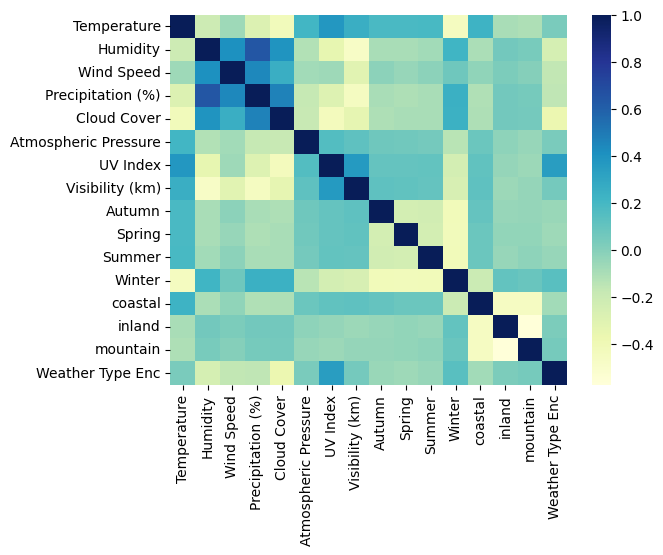

In [61]:
weather_prediction_corr = weather_prediction.corr()
sns.heatmap(weather_prediction_corr, cmap = 'YlGnBu')

Frequence of Target value Classes


Text(0, 0.5, 'no of weathers')

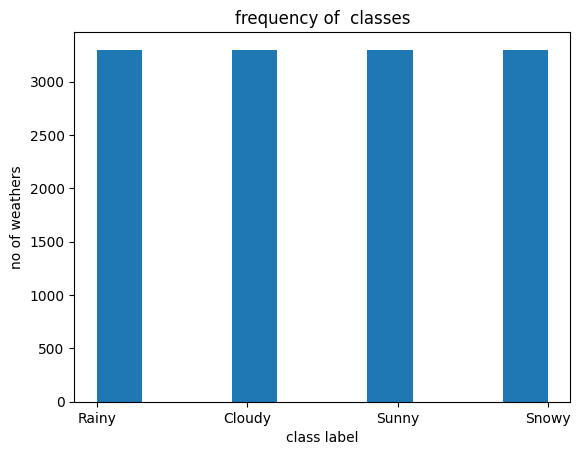

In [4]:
fig,ax = plt.subplots()
ax.hist(weather_prediction['Weather Type'])
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of weathers')

Saving the updated dataset


In [62]:
final_dataset = weather_prediction.to_csv('finaldataset.csv')